# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import numpy as np
aa = [4,9,5]
print(np.product(aa[0:2]))

36


In [2]:
a = "     a.      a.      "
b = list(a.split(" "))
print(b)

['', '', '', '', '', 'a.', '', '', '', '', '', 'a.', '', '', '', '', '', '']


In [18]:
u = {'a':'1','b':'2','c':'3'}
for x in u:
    print(x)

a
b
c


In [15]:
u = '%%%'
for i in range(len(u)):
    for j in range(97, 123):
        u = u[0:i] + chr(j) + u[i+1:]
        print(u)

a%%
b%%
c%%
d%%
e%%
f%%
g%%
h%%
i%%
j%%
k%%
l%%
m%%
n%%
o%%
p%%
q%%
r%%
s%%
t%%
u%%
v%%
w%%
x%%
y%%
z%%
za%
zb%
zc%
zd%
ze%
zf%
zg%
zh%
zi%
zj%
zk%
zl%
zm%
zn%
zo%
zp%
zq%
zr%
zs%
zt%
zu%
zv%
zw%
zx%
zy%
zz%
zza
zzb
zzc
zzd
zze
zzf
zzg
zzh
zzi
zzj
zzk
zzl
zzm
zzn
zzo
zzp
zzq
zzr
zzs
zzt
zzu
zzv
zzw
zzx
zzy
zzz


In [12]:
matrix =[["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]

In [10]:
import numpy as np
a = np.concatenate((np.zeros((1, 2)),np.array([[1,2]])),1)
print(a)

[[0. 0. 1. 2.]]


In [4]:
np.zeros((1, 2))

array([[0., 0.]])

In [6]:
np.zeros((1,2))

array([[0., 0.]])

In [21]:
        dp = []
        lm = len(matrix[0])
        for i in range(lm):
            dp.append([])
            if matrix[0][i] == "1":
                dp[0].append(1)
            else:
                dp[0].append(0)
        dp[0].append(0)
        for i in range(1,len(matrix)):
            dp.append([])
            for j in range(0,lm):
                if matrix[i][j] == "0":
                    dp[i].append(0)
                else:
                    dp[i].append(dp[i-1][j] + 1)
                #print(i,j,dp[i][j])
            dp[i].append(0)
        ans = 0
        for i in range(0,len(matrix)):
            tmp_m = []
            tmp_m.append({'id':0,'v':dp[i][0]})
            r = 0
            for j in range(1,lm+1):
                if(dp[i][j]>=tmp_m[r]['v']):
                    tmp_m.append({'id':j,'v':dp[i][j]})
                    r += 1
                else:
                    tmp_id = j
                    while(r>=0 and dp[i][j]<tmp_m[r]['v']):
                        ans = max(ans,(j-tmp_m[r]['id'])*tmp_m[r]['v'])
                        print(i,j,(j-tmp_m[r]['id'])*tmp_m[r]['v'],tmp_m[r]['v'],tmp_m[r]['id'])
                        tmp_id = r
                        r -= 1
                        tmp_m.pop()
                    tmp_m.append({'id':tmp_id,'v':dp[i][j]})
                    r += 1

0 1 1 1 0
0 3 1 1 2
1 1 2 2 0
1 3 2 2 2
1 5 1 1 4
1 5 4 1 1
2 1 3 3 0
2 3 3 3 2
2 5 2 2 4
2 5 8 2 1
2 5 5 1 0
3 1 4 4 0
3 4 3 3 3


In [11]:
print(ans)

15


In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

In [ ]:
print(X_train.shape)
a = X_train[0].copy()
print(a.shape)
a = a.squeeze()
print(len(a.shape))

In [ ]:
y= [ [1,2,3],[4,5,6,7]]
x = np.hstack(y)
print(x.shape)
x = x.T
print(x.shape)

In [ ]:
for i in np.arange(0.5,0.95,0.05):
    print(i)

In [ ]:
np.arange(0,1,0.1)

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your own interest.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [4]:
from cs231n.features import *

num_color_bins = 100 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]#lambda为匿名函数，img为入口参数
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

#归一化
# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

(144,) 144
(100,) 100
Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 

In [ ]:
print(X_train_feats.shape)

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 4e5,5e5,6e5, 5e6]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

pass

for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats,y_train,learning_rate=lr,reg=reg,num_iters=2500,batch_size=2000,verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        
        rate1 = np.mean(y_train == y_train_pred)
        rate2 = np.mean(y_val == y_val_pred)
        
        results[(lr,reg)] = (rate1, rate2)
        
        if rate2 > best_val:
            best_val = rate2
            best_svm = svm

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.075592 val accuracy: 0.077000
lr 1.000000e-09 reg 4.000000e+05 train accuracy: 0.096245 val accuracy: 0.108000
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.109041 val accuracy: 0.099000
lr 1.000000e-09 reg 6.000000e+05 train accuracy: 0.110265 val accuracy: 0.112000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.415592 val accuracy: 0.433000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.113000 val accuracy: 0.114000
lr 1.000000e-08 reg 4.000000e+05 train accuracy: 0.415612 val accuracy: 0.433000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.415469 val accuracy: 0.431000
lr 1.000000e-08 reg 6.000000e+05 train accuracy: 0.415245 val accuracy: 0.431000
lr 1.000000e-08 reg 5.000000e+06 train accuracy: 0.412102 val accuracy: 0.429000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.415592 val accuracy: 0.434000
lr 1.000000e-07 reg 4.000000e+05 train accuracy: 0.415020 val accuracy: 0.431000
lr 1.000000e-07 reg 5.000000

In [6]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.404


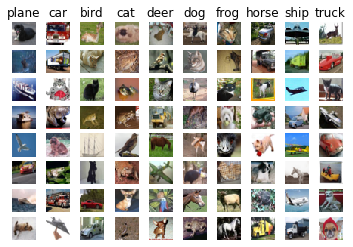

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?


$\color{blue}{\textit Your Answer:}$




In [ ]:
#说明训练的效果有一定的误差

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [5]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 245)
(49000, 244)


In [6]:
learning_rates = [1e-2 ,1e-1, 5e-1, 1, 5]
regularization_strengths = [1e-3, 5e-3, 1e-2, 1e-1, 0.5, 1]

In [7]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10
best_val = -1
net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
for lr in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        net.train(X_train_feats,y_train,X_val_feats,y_val,learning_rate=lr,reg=reg,num_iters=1500,batch_size=200,verbose=True)
        
        y_train_pred = net.predict(X_train_feats)
        y_val_pred = net.predict(X_val_feats)
        
        rate1 = np.mean(y_train==y_train_pred)
        rate2 = np.mean(y_val==y_val_pred)
        print(rate1,rate2)
        
        if rate2 > best_val:
            best_val = rate2
            best_net = net
        
print(best_val)

pass

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 1500: loss 2.302587
iteration 100 / 1500: loss 2.302413
iteration 200 / 1500: loss 2.302412
iteration 300 / 1500: loss 2.302475
iteration 400 / 1500: loss 2.302235
iteration 500 / 1500: loss 2.303016
iteration 600 / 1500: loss 2.302269
iteration 700 / 1500: loss 2.302178
iteration 800 / 1500: loss 2.302766
iteration 900 / 1500: loss 2.301885
iteration 1000 / 1500: loss 2.300710
iteration 1100 / 1500: loss 2.299369
iteration 1200 / 1500: loss 2.296604
iteration 1300 / 1500: loss 2.293101
iteration 1400 / 1500: loss 2.280957
0.21724489795918367 0.23
iteration 0 / 1500: loss 2.302592
iteration 100 / 1500: loss 2.302679
iteration 200 / 1500: loss 2.302541
iteration 300 / 1500: loss 2.302605
iteration 400 / 1500: loss 2.302554
iteration 500 / 1500: loss 2.302888
iteration 600 / 1500: loss 2.302299
iteration 700 / 1500: loss 2.302478
iteration 800 / 1500: loss 2.302687
iteration 900 / 1500: loss 2.301826
iteration 1000 / 1500: loss 2.301538
iteration 1100 / 1500: loss 2.300260


iteration 700 / 1500: loss 1.534065
iteration 800 / 1500: loss 1.588053
iteration 900 / 1500: loss 1.597326
iteration 1000 / 1500: loss 1.489672
iteration 1100 / 1500: loss 1.575790
iteration 1200 / 1500: loss 1.542745
iteration 1300 / 1500: loss 1.503997
iteration 1400 / 1500: loss 1.562848
0.5222040816326531 0.526
iteration 0 / 1500: loss 2.302712
iteration 100 / 1500: loss 2.196507
iteration 200 / 1500: loss 2.113405
iteration 300 / 1500: loss 2.099975
iteration 400 / 1500: loss 2.156333
iteration 500 / 1500: loss 2.114109
iteration 600 / 1500: loss 2.096801
iteration 700 / 1500: loss 2.143874
iteration 800 / 1500: loss 2.123189
iteration 900 / 1500: loss 2.114708
iteration 1000 / 1500: loss 2.107264
iteration 1100 / 1500: loss 2.065718
iteration 1200 / 1500: loss 2.192584
iteration 1300 / 1500: loss 2.111567
iteration 1400 / 1500: loss 2.188269
0.34744897959183674 0.357
iteration 0 / 1500: loss 2.303218
iteration 100 / 1500: loss 2.303326
iteration 200 / 1500: loss 2.301373
iterati

/Users/yinjiefei/cs231n/assignment1/cs231n/classifiers/neural_net.py:103: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(softmax_output[range(N),list(y)]))


iteration 100 / 1500: loss inf
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf


/Users/yinjiefei/cs231n/assignment1/cs231n/classifiers/neural_net.py:100: RuntimeWarning: overflow encountered in subtract
  result -= np.max(result, axis=1, keepdims=True)
/Users/yinjiefei/cs231n/assignment1/cs231n/classifiers/neural_net.py:100: RuntimeWarning: invalid value encountered in subtract
  result -= np.max(result, axis=1, keepdims=True)
/Users/yinjiefei/cs231n/assignment1/cs231n/classifiers/neural_net.py:129: RuntimeWarning: invalid value encountered in greater
  s2_relu = (scores1>0)*s2


iteration 700 / 1500: loss nan
iteration 800 / 1500: loss nan
iteration 900 / 1500: loss nan
iteration 1000 / 1500: loss nan
iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
0.10026530612244898 0.087
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss inf
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf


/Users/yinjiefei/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


iteration 400 / 1500: loss nan
iteration 500 / 1500: loss nan
iteration 600 / 1500: loss nan
iteration 700 / 1500: loss nan
iteration 800 / 1500: loss nan
iteration 900 / 1500: loss nan
iteration 1000 / 1500: loss nan
iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
0.10026530612244898 0.087
iteration 0 / 1500: loss 2.302591
iteration 100 / 1500: loss inf
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf


/Users/yinjiefei/cs231n/assignment1/cs231n/classifiers/neural_net.py:105: RuntimeWarning: overflow encountered in multiply
  loss += reg*(np.sum(W1*W1) + np.sum(W2*W2))


iteration 400 / 1500: loss nan
iteration 500 / 1500: loss nan
iteration 600 / 1500: loss nan
iteration 700 / 1500: loss nan
iteration 800 / 1500: loss nan
iteration 900 / 1500: loss nan
iteration 1000 / 1500: loss nan
iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
0.10026530612244898 0.087
iteration 0 / 1500: loss 2.302598
iteration 100 / 1500: loss inf
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss nan
iteration 500 / 1500: loss nan
iteration 600 / 1500: loss nan
iteration 700 / 1500: loss nan
iteration 800 / 1500: loss nan
iteration 900 / 1500: loss nan
iteration 1000 / 1500: loss nan
iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
0.10026530612244898 0.087
iteration 0 / 1500: loss 2.302712
iteration 100 / 1500: loss inf
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
it

In [9]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.577


In [8]:
print(best_net)

In [9]:
import torch as t
a = t.tensor([[1,2,3],[4,5,6],[7,8,9],[2,2,2]])
print(a[...,0])

tensor([1, 4, 7, 2])
